<a href="https://www.kaggle.com/adhang/boston-house-prices-simple-linear-regression?scriptVersionId=87380714" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About
Author: Adhang Muntaha Muhammad

[GitHub](https://github.com/adhang)
[LinkedIn](https://www.linkedin.com/in/adhangmuntaha/)
___
This is my learning project. With this dataset, I will use linear regression to predict house price. In this project, I will use univariate linear regression and multivariate linear regression.
<br><br>
**Contents:**
1. Attribute Information
2. Import Libraries
3. Read Dataset
4. Checking Null Values
5. Exploratory Data Analysis
    - Descriptive Statistics
    - Data Distribution
        - Subplots
        - Histogram of Data Distribution
        - Density of Data Distribution
        - Histogram and Density
    - Handling Skewed Data
        - Log Transform
        - Square Root Transform
        - Box-Cox Transform
    - Correlation
6. Univariate Linear Regression
    - Feature Selection
    - Instantiating the Model
    - Train - Test Split
    - Fitting the Model
    - Parameter Estimates
    - Prediction
    - Model Evaluation
        - Residual
        - Mean Squared Error
        - R-Squared
7. Multivariate Linear Regression
    - Building the Model
    - Visualizing the Data
8. Comparing the Model
    - Mean Squared Error
    - R-Squared
9. Conclusion
    

# Attribute Information
Input features in order:
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per $10,000 [$/10k]
11. PTRATIO: pupil-teacher ratio by town
12. B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population

Output variable:
1. MEDV: Median value of owner-occupied homes in \$1000s

# Import Libraries
- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`
- `sklearn`

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set_theme()

# Read Dataset

In [2]:
data = pd.read_csv('../input/the-boston-houseprice-data/boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Checking Null Values

In [3]:
# check data type for each column
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
# check total null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
# summarize the data type and null values
# just for better visual
data_type = pd.DataFrame(data.dtypes).T.rename({0:'Column Data Type'})
null_value = pd.DataFrame(data.isnull().sum()).T.rename({0:'Null Values'})

# combine the data
data_info = data_type.append(null_value)
data_info

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
Column Data Type,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# our data has no null values, but I want to see the percentage
# it may useful for next project
null_percentage = pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.rename({0:'Percentage of Null Values'}).round(2)

# combine the data
data_info = data_info.append(null_percentage)
data_info

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
Column Data Type,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percentage of Null Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis

## Descriptive Statistics

In [7]:
# descriptive statistics
data.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


## Data Distribution
We can use histogram to see the data distribution. There are several ways to make histogram plot.

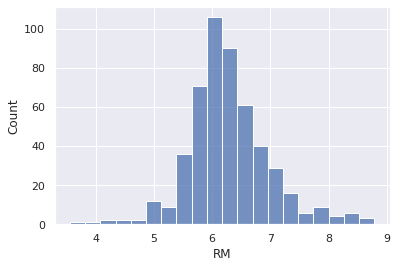

In [8]:
sns.histplot(data=data, x='RM', bins=20)
plt.show()

The distribution of `RM` column is good, because it's not skewed. How about the other?

### Histogram of Data Distribution
A histogram plot is a discrete plot, with some bins to represent the distribution of data.

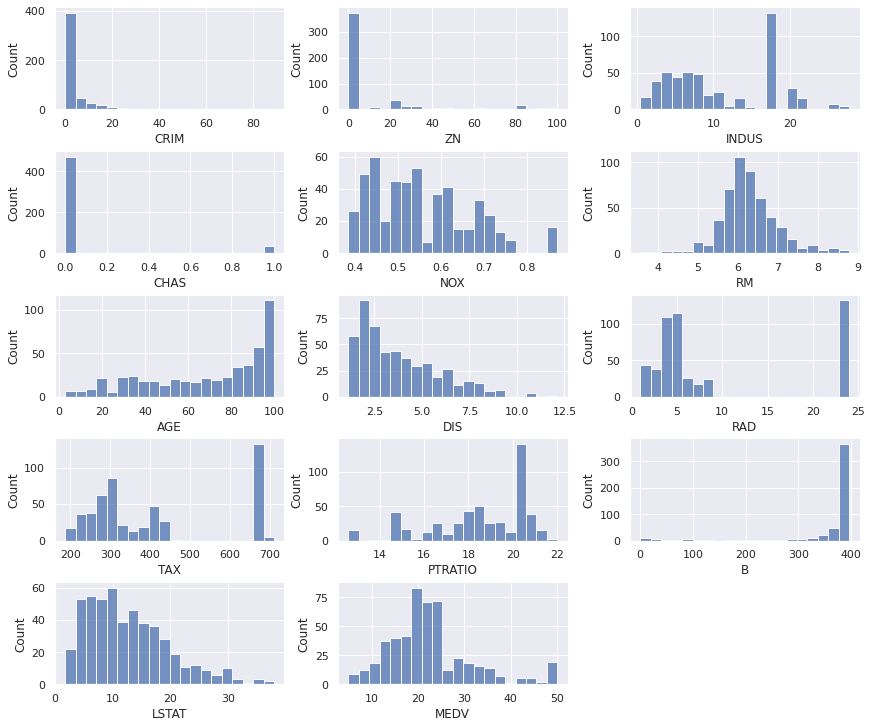

In [9]:
# get all column name
column_list = list(data.columns)

fig, ax = plt.subplots(5,3, figsize=(12,10), constrained_layout=True)
# axes_list = []
# for axes_row in ax:
#     for axes in axes_row:
#         axes_list.append(axes)

# it's same as the above looping, but in a shorter way
# it may difficult to understand for beginner
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col_name in enumerate(column_list):
    sns.histplot(data=data, x=col_name, ax=axes_list[i], bins=20)

# I will hide the last axes, since it's an empty plot
axes_list[14].set_visible(False)

# remove axes line on top-right
sns.despine()
plt.show()

### Density of Data Distribution
A density plot is a continuous (smoothed) version of a histogram. Our data is not continuous, there may some gap between values, So, we need an estimator. The most common form of estimation is kernel density estimation (KDE).

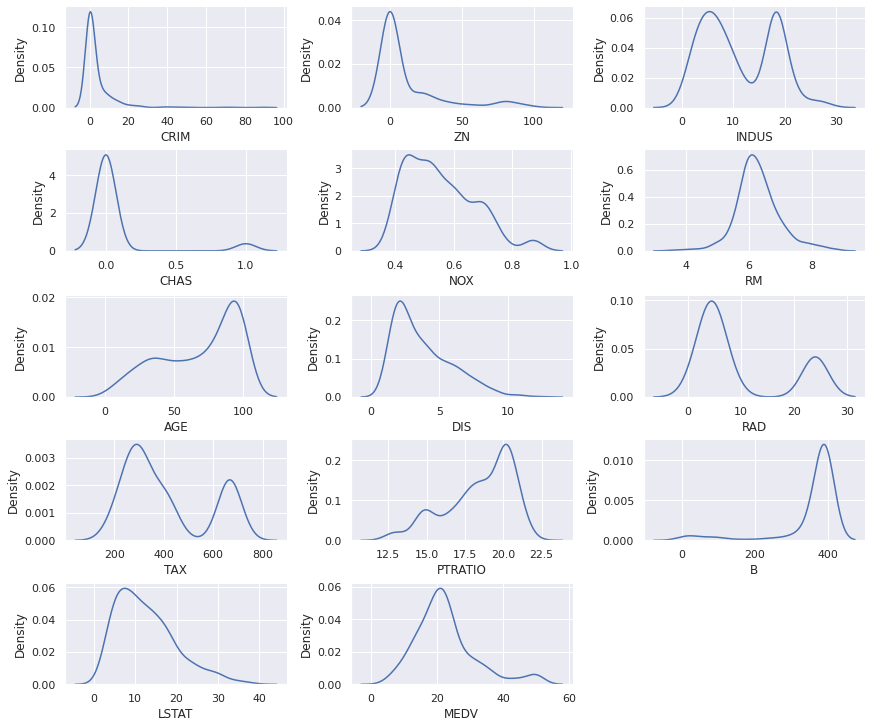

In [10]:
fig, ax = plt.subplots(5,3, figsize=(12,10), constrained_layout=True)
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col_name in enumerate(column_list):
    sns.kdeplot(data=data, x=col_name, ax=axes_list[i])

# I will hide the last axes, since it's an empty plot
axes_list[14].set_visible(False)

# remove axes line on top-right
sns.despine()
plt.show()

### Histogram and Density
We can combine histogram and density in 1 plot.

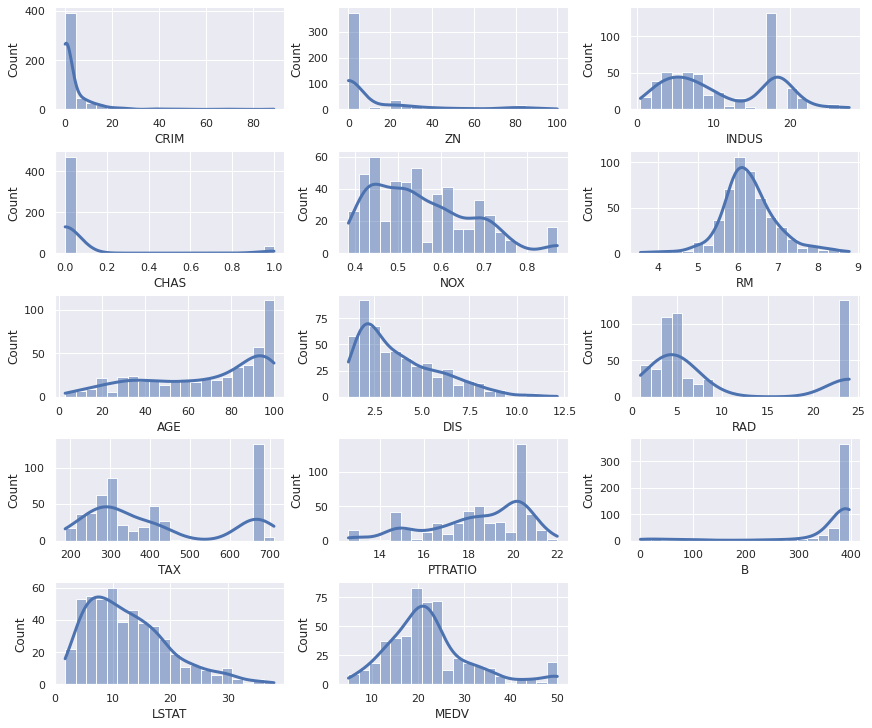

In [11]:
fig, ax = plt.subplots(5,3, figsize=(12,10), constrained_layout=True)
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col_name in enumerate(column_list):
    sns.histplot(data=data, x=col_name, ax=axes_list[i], bins=20, kde=True, line_kws={'linewidth':3})

# I will hide the last axes, since it's an empty plot
axes_list[14].set_visible(False)

# remove axes line on top-right
sns.despine()
plt.show()

As you can see, some attributes are skewed and not in normal distribution form.

## Handling Skewed Data
Some method for handling skewed data:
- Log transform
- Square root transform
- Box-cox transform

In [12]:
data.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [13]:
# combine with our data previous data info
data_skewness = pd.DataFrame(data.skew()).T.rename({0:'Data Skewness'}).round(2)

data_info = data_info.append(data_skewness)
data_info

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
Column Data Type,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
Null Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percentage of Null Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Data Skewness,5.22,2.23,0.3,3.41,0.73,0.4,-0.6,1.01,1.0,0.67,-0.8,-2.89,0.91,1.11


We can see that`CRIM` has the largest skewness. Let's fix it.

### Log Transform
We can use Numpy log function to transform our data.

In [14]:
crim_log = np.log(data['CRIM'])
crim_log.skew().round(2)

0.41

Using log transform, we have reduce the `CRIM` skewness. But, how about the distribution of `CRIM` data? Let's visualize it

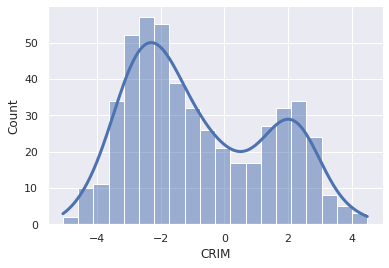

In [15]:
sns.histplot(crim_log, bins=20, kde=True, line_kws={'linewidth':3})
sns.despine()
plt.show()

It still not in normal distribution form, but it's way much better than before.

### Square Root Transform
Again, we can use Numpy function to transform our data.

In [16]:
crim_sqrt = np.sqrt(data['CRIM'])
crim_sqrt.skew().round(2)

2.02

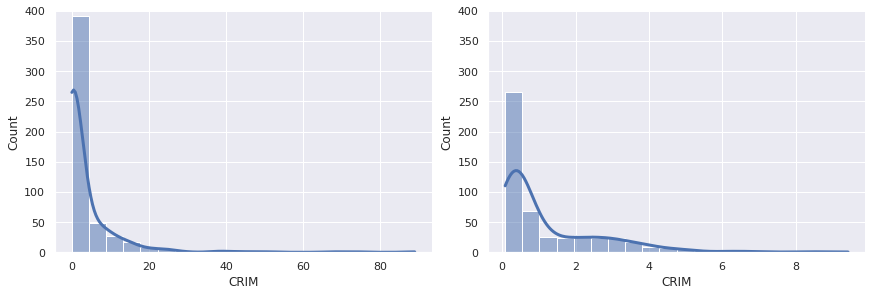

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True)

sns.histplot(data['CRIM'], bins=20, kde=True, ax=ax[0], line_kws={'linewidth':3})
ax[0].set_ylim(0,400)

sns.histplot(crim_sqrt, bins=20, kde=True, ax=ax[1], line_kws={'linewidth':3})
ax[1].set_ylim(0,400)

sns.despine()
plt.show()

From 5.22 to 2.02, I think it's not a really big difference. And the distribution is almost same, but the range is smaller.

### Box-Cox Transform
I won't explain all the math behind this transformation. But there's one thing that you have to pay attention. To use this transformation, **your data must be positive**.

We can use Scipy library for this transformation.

In [18]:
from scipy import stats

cal_crim_boxcox = stats.boxcox(data['CRIM'])[0]
# cal_crim_boxcox

Since it returns an array, we need to convert it to Series (or Dataframe) to see the skewness.

In [19]:
crim_boxcox = pd.Series(cal_crim_boxcox)
crim_boxcox.skew().round(2)

0.09

Great, now our skewness is really small. Let's see the data distribution again.

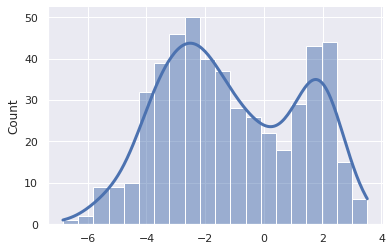

In [20]:
sns.histplot(crim_boxcox, bins=20, kde=True, line_kws={'linewidth':3})
sns.despine()
plt.show()

It has similar distribution with the log transform. But I think it's better since the skewness is lower than using log transform.

**Notes:** For this project, I won't use `CRIM` attribute just for simplicity reason. I do skewed data handling just for learning purpose. To be honest, I'm not using transformed data because I still don't know how to reverse transform. So, maybe I'll do it in the next project.

## Correlation
- It's used to see the relationship between features
- Correlation value is between -1 to 1
- Correlation value = -1 means negative correlation. If 'X' goes bigger, 'Y' goes smaller
- Correlation value = 1 means positive correlation. If 'X' goes bigger, 'Y' also goes bigger
- Correlation value = 0 means, there's no correlation between 'X' and 'Y'

In [21]:
corr_matrix = data.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Visulization can help us to see correlation more clearly.

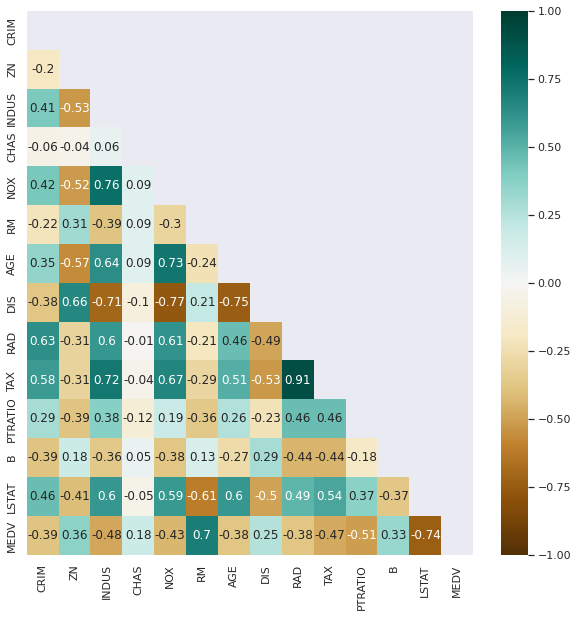

In [22]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

Based on above correlation plot, we can see that `RM` and `LSTAT` has the highest correlation with `MEDV`. We can use scatter plot to see the correlation between attributes.

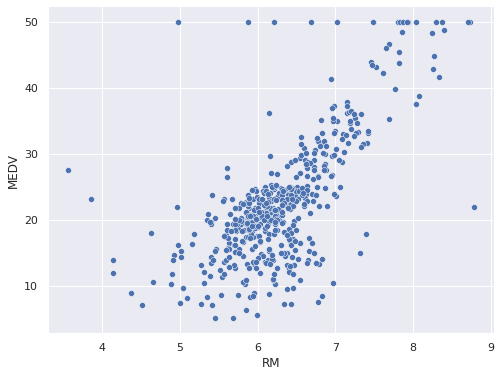

In [23]:
# RM and MEDV

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='RM', y='MEDV')
sns.despine()
plt.show()

From this plot, we can see that `RM` has positive correlation with `MEDV`, just like the correlation heatmap above.

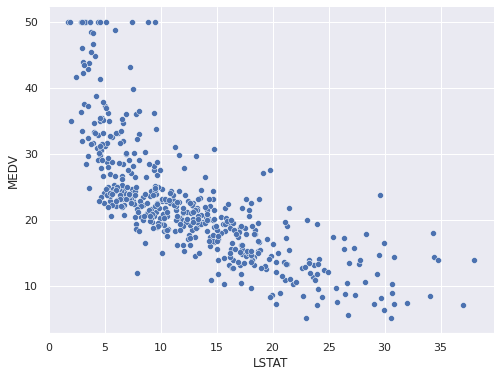

In [24]:
# LSTAT and MEDV

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='LSTAT', y='MEDV')
sns.despine()
plt.show()

From this plot, we can see that `LSTAT` has negative correlation with `MEDV`, just like the correlation heatmap above.

# Univariate Linear Regression
Univariate Linear Regression means I will do Linear Regression but only use 1 attribute to predict the output.

From mathematic point of view, univariate linear regression is a way to find parameters for linear equation:

$Y = a*X + b$

Where,
- $Y$ = output
- $X$ = input
- $a$ = slope of the line (gradient) aka regression coefficient
- $b$ = intercept

We already have $X$ an $Y$ value, linear regression algorithm will find the best $a$ and $b$ parameter for us.

## Feature Selection
Since `RM` has the highest correlation to `MEDV`, I will use this attribute to make univariate linear regression.

In [25]:
# I use [[]] to create a dataframe
# if you use [], it will create a series

X = data[['RM']]
X.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [26]:
Y = data[['MEDV']]
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Instantiating the Model
For this project, I will use Scikit-learn library to make linear regression. But there are some notes when using this library:
- Every model inside scikit-learn saved as class, not an instance
- We need to create instance using class of the model we want to use
- We can say that an instance of a class is an object of a class

In [27]:
# import linear regression library
from sklearn.linear_model import LinearRegression

# instantiating the model
model = LinearRegression()

## Train - Test Split
We need to split our dataset into 2 dataset:
- Train dataset, used to train our model. Machine will try to capture the pattern of our dataset. And that's what we called model.
- Test dataset, used to test our model

Rule of thumb for splitting dataset is 70% for train dataset and 30% for test dataset.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1)

In [29]:
# let's see the shape of each dataset

print(X.shape)
print(Y.shape)
print()
print(X_train.shape)
print(Y_train.shape)
print()
print(X_test.shape)
print(Y_test.shape)

(506, 1)
(506, 1)

(354, 1)
(354, 1)

(152, 1)
(152, 1)


## Fitting the Model
Fitting means we sent our dataset to the machine for learning the pattern.

In [30]:
model.fit(X_train, Y_train)

LinearRegression()

## Parameter Estimates
- After training the model, sklearn's parameters are saved inside model's object
- The name of that parameter is always followed by underscore simbol (\_)

In [31]:
# first, let's see the coefficient value (a)
model_coef = model.coef_
model_coef.round(2)

array([[8.46]])

In [32]:
# model intercept (b)
model_intercept = model.intercept_
model_intercept.round(2)

array([-30.57])

## Prediction
From these parameters, we can form our equation:

$Y = a * X + b$

$Y = 8.46 * X + (-30.57)$

Hence,

$MEDV = 8.46 * RM - 30.57$

Let's try to predict `MEDV` with new `RM` data. Make sure our input is 2D array. We can use `reshape(-1,1)` to transform our data into 2D.

In [33]:
# using built-in predict
new_RM = np.array([6.5]).reshape(-1,1)
model.predict(new_RM).round(2)

array([[24.43]])

In [34]:
# using equation
equation_predict = (model_coef * new_RM) + model_intercept
equation_predict.round(2)

array([[24.43]])

Using built-in `predict` or calculate it using equation gives a same result. Then, how about predicting the test dataset?

In [35]:
# predict test dataset
y_test_pred = model.predict(X_test)

# let's check the prediction and actual value
print(Y_test[:5].values)
print()
print(y_test_pred[:5].round(2))

[[28.2]
 [23.9]
 [16.6]
 [22. ]
 [20.8]]

[[27.38]
 [26.08]
 [20.45]
 [19.16]
 [14.8 ]]


## Model Evaluation
Used to evaluate the performance of our model

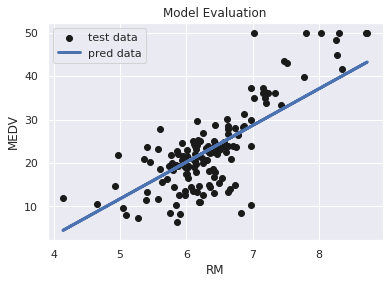

In [36]:
plt.scatter(X_test, Y_test, label='test data', color='k')
plt.plot(X_test, y_test_pred, label='pred data', color='b', linewidth=3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Model Evaluation')
plt.legend(loc='upper left')

# plt.savefig('./output/linear-regression.png')
plt.show()

### Residual
- It is the difference between the prediction results and the test data
- So we can call it as error
- If residual is in random form, not patterned, it means the model 'works'
- If residual = patterned (linear/nonlinear), there is a possibility for improvement
- Ideal residual = symmetrical and random

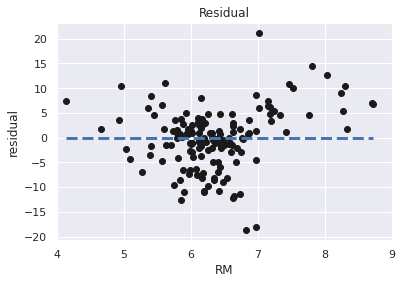

In [37]:
residual = Y_test - y_test_pred

plt.scatter(X_test, residual, color='k')
plt.hlines(y=0, xmin=X_test.min(), xmax=X_test.max(), linestyle='--', linewidth=3)
plt.xlim((4,9))
plt.xlabel('RM')
plt.ylabel('residual')
plt.title('Residual')
plt.show()

### Mean Squared Error
How to define our model performance? We can use the residual (error) value, and calculate the average. So, we get the average of residuals.

In [38]:
residual.mean().round(2)

MEDV   -0.24
dtype: float64

- The average of residual is -0.24, it's close to 0
- But there is a problem: residuals can be positive or negative
- Averaging 'cancelled' the value, so it's not accurate
- Solution: make a square for each residual, then do the average (mean squared error)

We can calculate the MSE manually, or using built-in function from Scikit-learn.

In [39]:
# manual calculation
(residual**2).mean().round(2)

MEDV    36.52
dtype: float64

In [40]:
# using function from scikit-learn
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, y_test_pred).round(2)

36.52

- In general, the smaller the MSE, the better, yet there is no absolute good or bad threshold.
- We can define it based on the dependent variable, i.e., MEDV in the test set.
- To make the scale of errors to be the same as the scale of targets, root mean squared error (RMSE) is often used. It is the square root of MSE.

In [41]:
np.sqrt(mean_squared_error(Y_test, y_test_pred)).round(2)

6.04

### R-Squared
It is the proportion of total variation explained by the model. We can use `score()` to obtain R-squared value.

In [42]:
model.score(X_test, Y_test).round(3)

0.602

Here, around 60% of variability in the testing data is explained by our model.

If you want to manually calculate R-squared, you need to calculate variance of test dataset and residual.

Step to calculate variance:
- Calculate the difference between each datapoint with the average
- Calculate the squared of difference
- Sum all of the squared root, it's called variance

#### Total Variance of Test Set

In [43]:
# step 1, calculate the difference
diff = (Y_test - Y_test.mean())
diff.head()

,MEDV
307,5.217763
343,0.917763
47,-6.382237
67,-0.982237
362,-2.182237


In [44]:
# step 2, calculate the squared of difference
squared = diff**2
squared.head()

,MEDV
307,27.225052
343,0.842289
47,40.732947
67,0.964789
362,4.762158


In [45]:
# step 3, sum all the squared root
variance_test = squared.sum()
variance_test.round(2)

MEDV    13931.48
dtype: float64

#### Total Variance of Residual
- Since residual = Y_test - y_test_pred, we can say residual = diff
- I will calculate the variance in 1 line of code to make it simple

In [46]:
variance_residual = (residual**2).sum()
variance_residual.round(2)

MEDV    5550.62
dtype: float64

#### Proportion of Total Variation
It's R-squared.

In [47]:
R_sqr = 1 - (variance_residual)/(variance_test)
R_sqr.round(3)

MEDV    0.602
dtype: float64

It has the same value with `score()`, right?
- A perfect model explains all the variation in the data.
- Note R-squared is between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean while 100% indicates that the model explains all of it.

# Multivariate Linear Regression
Multivariate Linear Regression means I will do Linear Regression with more than 1 attribute to predict the output.

From mathematic point of view, multivariate linear regression is similar to univariate linear regression, it's a way to find parameters for linear equation:

$Y = a_1*X_1 + a_2*X_2 + ... + a_n * X_n + b$

Where,
- $Y$ = output
- $X$ = input
- $a$ = slope of the line (gradient) aka regression coefficient
- $b$ = intercept

We already have $X$ an $Y$ value, linear regression algorithm will find the best $a$ and $b$ parameter for us. But, this time we need to find more than 1 coefficient. For multivariate linear regression, I will use `RM` and `LSTAT` to predict `MEDV` those have highest correlation to `MEDV`.

The steps are same as univariate regression, so I'll straight to coding without many explanations.

## Building the Model

In [48]:
# feature selection
X2 = data[['RM','LSTAT']]
Y = data[['MEDV']]

# train - test split
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=1)

# instantiating the model
model_2 = LinearRegression()

# fitting the model
model_2.fit(X2_train, Y_train)

LinearRegression()

In [49]:
model_2_coef = model_2.coef_.round(2)
model_2_coef

array([[ 4.13, -0.68]])

In [50]:
model_2_intercept = model_2.intercept_.round(2)
model_2_intercept

array([5.32])

From the above values, we can rewrite our equation:

$Y = a_1*X_1 + a_2*X_2 + b$

$Y = 4.13*X_1 + (-0.68)*X_2 + 5.32$

Hence,

$MEDV = 4.13*RM - 0.68*LSTAT + 5.32$

In [51]:
# predict
y_test_pred_2 = model_2.predict(X2_test)

## Visualizing the Data

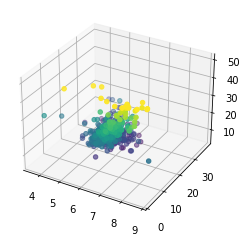

In [52]:
# I'm resetting the seaborn theme
# because the surface can't be transparent
sns.reset_orig()

# visualize the data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# X_viz = X2.values.reshape(-1,2)
# x1 = X_viz[:,0]
# x2 = X_viz[:,1]
x1 = X2['RM']
x2 = X2['LSTAT']
x3 = Y['MEDV']

ax.scatter3D(x1, x2, x3, c=x3, cmap='viridis');

plt.show()

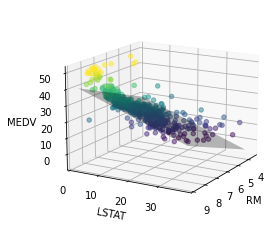

In [53]:
# adding a meshgrid
x_surf, y_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 100), np.linspace(x2.min(), x2.max(), 100))
onlyX = pd.DataFrame({
        'RM':x_surf.ravel(),
        'LSTAT':y_surf.ravel()})
fittedY = model_2.predict(onlyX)
fittedY = np.array(fittedY)

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=x3, cmap='viridis', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY.reshape(x_surf.shape), color='None', alpha=0.3)
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
ax.view_init(elev=15, azim=30)
plt.show()

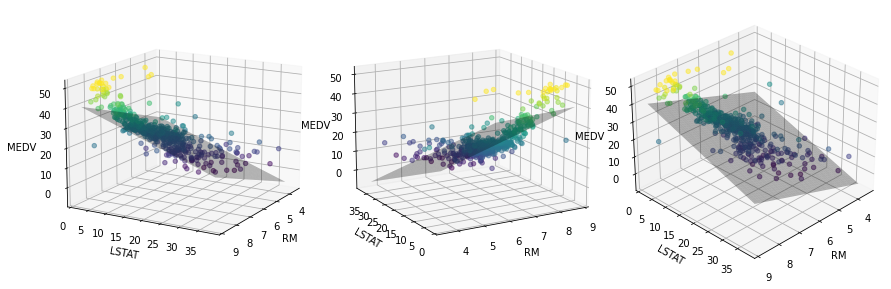

In [54]:
# plot with different point of view
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1, ax2, ax3]

for ax in axes:
    ax.scatter(x1, x2, x3, c=x3, cmap='viridis', marker='o', alpha=0.5)
    ax.plot_surface(x_surf, y_surf, fittedY.reshape(x_surf.shape), color='None', alpha=0.3)
    ax.set_xlabel('RM')
    ax.set_ylabel('LSTAT')
    ax.set_zlabel('MEDV')

ax1.view_init(elev=15, azim=30)
ax2.view_init(elev=15, azim=-120)
ax3.view_init(elev=30, azim=45)
fig.tight_layout()
plt.show()

# Comparing Model

## Mean Squared Error
- An easy metric for linear regression is the mean squared error (MSE) on the testing data
- Better models have lower MSE

In [55]:
mse_1 = mean_squared_error(Y_test, y_test_pred)
mse_2 = mean_squared_error(Y_test, y_test_pred_2)

print('Univariate Linear Regression MSE:', mse_1.round(2))
print('Multivariate Linear Regression MSE:', mse_2.round(2))

Univariate Linear Regression MSE: 36.52
Multivariate Linear Regression MSE: 28.93


In [56]:
# calculate improvement of MSE
mse_percentage = (mse_1-mse_2)/mse_1 * 100

print(f'Improvement: {mse_percentage.round(2)}% reduction')

Improvement: 20.76% reduction


## R-Squared
- Another scoring method, we can use R-squared
- Better models have higher R-squared (range from 0% - 100%)

In [57]:
R_sqr_1 = model.score(X_test, Y_test)
R_sqr_2 = model_2.score(X2_test, Y_test)

print('Univariate Linear Regression R-Squared:', R_sqr_1.round(3))
print('Multivariate Linear Regression R-Squared:', R_sqr_2.round(3))

Univariate Linear Regression R-Squared: 0.602
Multivariate Linear Regression R-Squared: 0.684


In [58]:
# calculate improvement of MSE
R_sqr_percentage = (R_sqr_2-R_sqr_1)/R_sqr_1 * 100

print(f'Improvement: {R_sqr_percentage.round(2)}% adjustment')

Improvement: 13.75% adjustment


# Conclusion
Using multivariate linear regression, we can see some improvement. But, the R-square score is still under 70%. So, this project has a possibility for improvement. Such as handling the imbalance (skewed) data, feature selection, etc.

Anyway, thank you for reading this project. See you in the next project!